In [1]:
from scifit.solvers.scientific import *

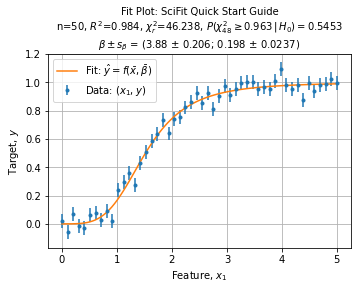

In [2]:
# Select a specific solver:
solver = HillEquationFitSolver()

# Create some synthetic dataset:
data = solver.synthetic_dataset(
    xmin=0.0, xmax=5.0, resolution=50,
    parameters=[3.75, 0.21],
    sigma=0.1, scale_mode="auto", seed=1234,
)

# Perform regression:
solution = solver.fit(data)

# Render results:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

In [4]:
solver.report("test", path=".")